In [85]:
%matplotlib inline
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
#Turtle Color Map
ntcolormap = ['#800080', '#FFA500', 'b', 'r']

In [86]:
nt= pd.read_csv('cartoon-Ninja-Turtles.csv', parse_dates=['date_published', 'date_updated'], index_col='date_published')
nt.drop('Unnamed: 0', axis=1, inplace=True)
nt.columns.values

array(['id', 'title', 'author', 'chapter_count', 'word_count',
       'date_updated', 'rated', 'status', 'language', 'genre',
       'characters', 'reviews', 'Adventure', 'Angst', 'Crime', 'Drama',
       'Family', 'Fantasy', 'Friendship', 'General', 'Horror', 'Humor',
       'Hurt/Comfort', 'Mystery', 'Parody', 'Poetry', 'Romance', 'Sci-Fi',
       'Spiritual', 'Supernatural', 'Suspense', 'Tragedy', 'Western',
       'Agent Bishop', 'Ancient One', 'Angel', "April O'Neil",
       'Baxter Stockman', 'Bloodsucker', 'Casey Jones', 'Chaplin',
       'Cody Jones', 'Dark Turtles', 'Donatello', 'Draco', 'Foot Ninja',
       'Hun', 'Irma L.', 'Joy Reno', 'Justice Force', 'Karai', 'Katmandu',
       'Klunk', 'Krang', 'Leatherhead', 'Leonardo', 'Lotus',
       'Michelangelo', 'Mighty Mutanimals', 'Monalisa', 'Neutrinos',
       'Ninjara', 'OC', 'Oyuki M.', 'Radical', 'Raphael', 'Rat King',
       'Renet', 'Serling', 'Shadow J.', 'Shen', 'Shredder', 'Slash',
       'Splinter', 'Starly', 'Super Tu

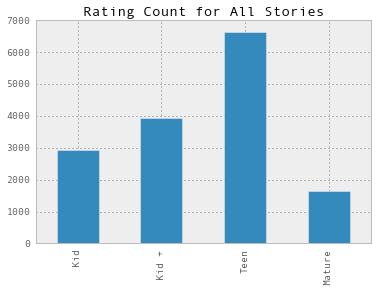

In [87]:
#plot a bar chart showing the distribution of ratings
ntr = nt['rated'].value_counts()
ntr_sort = ['K','K+','T','M']
ntr_sort_full = {'K' : 'Kid', 'K+' : 'Kid +', 'T' : 'Teen','M': 'Mature'}
ntr = ntr[ntr_sort]
ntr = ntr.rename(ntr_sort_full)
rplot = ntr.plot(kind='bar', title="Rating Count for All Stories")

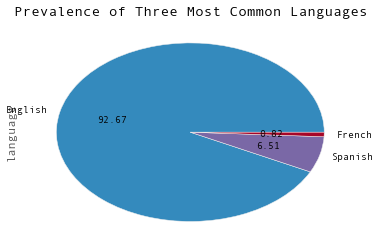

In [88]:
#number of stories in the top three most used languages
nt['language'].value_counts().head(3).plot(kind='pie', title="Prevalence of Three Most Common Languages",  autopct='%.2f')

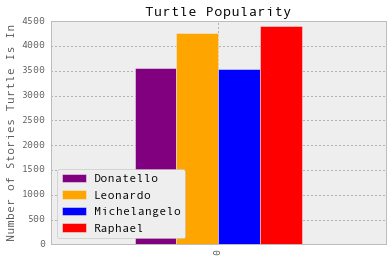

In [89]:
#who is the most popular turtle?
turtles = ['Donatello', 'Michelangelo', 'Leonardo', 'Raphael']
turtle_c = {}
for turtle in turtles:
    count = [nt[turtle].value_counts()[1]]
    turtle_c.update({turtle: count})
    
pop = pd.DataFrame.from_dict(turtle_c).head()
popp = pop.plot(kind='bar', color=ntcolormap, title='Turtle Popularity')
popp.set_ylabel("Number of Stories Turtle Is In")
popp.legend(loc=3,ncol=1)

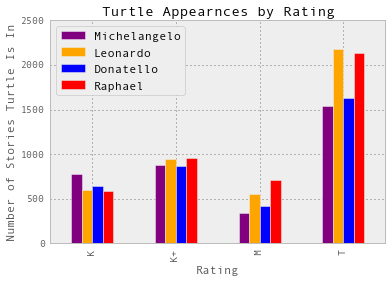

In [90]:
#which turtle is in the most M rated stories?
tr = nt[['rated', 'Michelangelo', 'Leonardo', 'Donatello', 'Raphael']].groupby('rated').sum()
trp = tr.plot(kind='bar', color=ntcolormap, title='Turtle Appearnces by Rating')
trp.set_xlabel("Rating")
trp.set_ylabel("Number of Stories Turtle Is In")

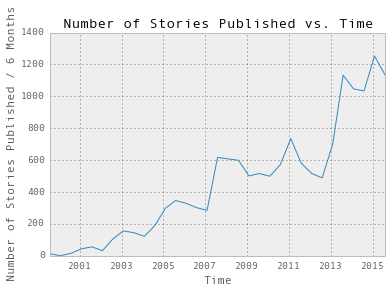

In [91]:
#plot number of stories per year
scount = nt['id'].resample('6M', how='count')
scount_plot = scount[:'2015-8'].plot(kind='line', legend = False, title = 'Number of Stories Published vs. Time')
scount_plot.set_xlabel("Time")
scount_plot.set_ylabel("Number of Stories Published / 6 Months")

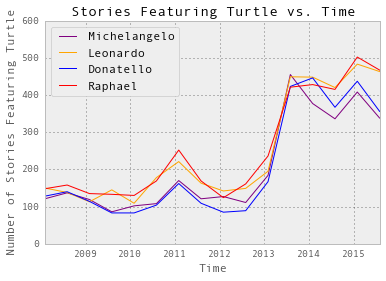

In [92]:
#plot turtle popularity
#filtered to dates between 2008 and current date. (Drops last 6 months because they are incomplete)
#ntcar = nt[nt.date_published > '2006-06-01']
cars = nt[['Michelangelo', 'Leonardo', 'Donatello', 'Raphael']].resample('6M', how='sum')
cars = cars['2008':'2015-8'].plot(kind='line', color=ntcolormap)
cars.set_title("Stories Featuring Turtle vs. Time")
cars.set_xlabel("Time")
cars.set_ylabel("Number of Stories Featuring Turtle")
#cars.head
#start at 2008 ish, drop last 6mo because incomplete

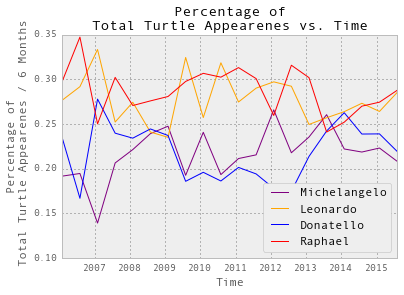

In [111]:
#plot turtle popularity as percentage of all turtle metions
ntcar.columns.values
ntcarpera = ntcar.div(ntcar.sum(axis=1), axis='index')

trs = ntcarpera['2006':'2015-8'].plot(color=customcmap, title='Percentage of \nTotal Turtle Appearenes vs. Time')
trs.set_xlabel("Time")
trs.set_ylabel("Percentage of \n Total Turtle Appearenes / 6 Months")

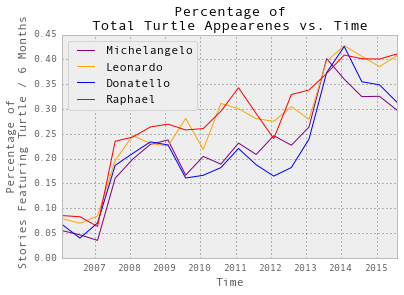

In [113]:
#plot turtle popularity as percentage of as a pecentage of storys
ntcarpers = ntcar.div(scount, axis='index')
ntcarpers[:20]

trs = ntcarpers['2006':'2015-8'].plot(color=customcmap, title='Percentage of \nTotal Turtle Appearenes vs. Time')
trs.set_xlabel("Time")
trs.set_ylabel("Percentage of \n Stories Featuring Turtle / 6 Months")

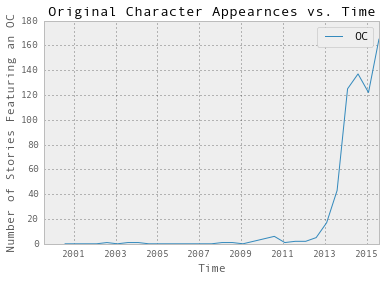

In [103]:
#Plot OC stroies per 6 months
ocp = nt[['OC']].resample('6M', how=sum)[:'2015-8'].plot(kind='line', title='Original Character Appearnces vs. Time')
ocp.set_xlabel("Time")
ocp.set_ylabel("Number of Stories Featuring an OC")

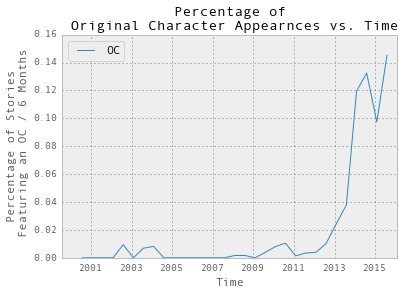

In [108]:
#Plot OC stroies per 6 months
ocp = nt[['OC']].resample('6M', how=sum)[:'2015-8'].div(scount, axis='index')


ocp = ocp.plot(kind='line', title='Percentage of \n Original Character Appearnces vs. Time')
ocp.set_xlabel("Time")
ocp.set_ylabel("Percentage of Stories \n Featuring an OC / 6 Months")